<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/Kaggle_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Tobigs/kaggle_data_NN/"
Train = pd.read_csv(path + "Train.csv")
Test = pd.read_csv(path + "Test.csv")
submission = pd.read_csv(path + "submission.csv")


In [ ]:
Train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59495,0,0,0,0,0,0,0,0,0,0,...,1,0,15,85,65,0,0,0,0,2
59496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59498,0,0,0,0,0,0,0,0,0,0,...,0,0,44,105,103,0,0,0,0,4


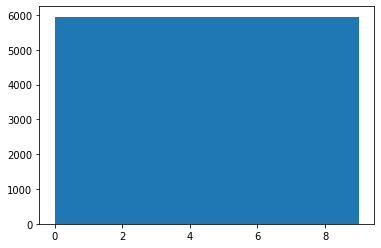

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.hist(Train['label'])
plt.show()

In [ ]:
Train['label'].nunique()

10

In [ ]:
Train = Train.values
X = Train[:,:-1]
X = X.reshape(-1,28, 28,1)
y = Train[:,-1]

In [ ]:
Test = Test.values
x_test = Test.reshape(-1,28, 28,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

In [ ]:
X_train.shape, y_train.shape, X_val.shape,y_val.shape, x_test.shape

((47600, 28, 28, 1),
 (47600,),
 (11900, 28, 28, 1),
 (11900,),
 (10500, 28, 28, 1))

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
x_test = x_test / 255.0

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils import np_utils

In [ ]:
x_train_fin= X_train.astype('float32')
x_val_fin= X_val.astype('float32')
x_test_fin= x_test.astype('float32')

batch_size =64


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),                 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),   
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),    
    #label feature가 10
    Dense(10, activation='softmax'),])





In [ ]:
from keras import optimizers
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
result = model.fit(train, epochs = 50)

Epoch 1/50
744/744 [==============================] - 644s 865ms/step - loss: 0.5798 - sparse_categorical_accuracy: 0.7848
Epoch 2/50
744/744 [==============================] - 642s 862ms/step - loss: 0.4350 - sparse_categorical_accuracy: 0.8414
Epoch 3/50
744/744 [==============================] - 642s 863ms/step - loss: 0.3811 - sparse_categorical_accuracy: 0.8611
Epoch 4/50
744/744 [==============================] - 642s 863ms/step - loss: 0.3468 - sparse_categorical_accuracy: 0.8731
Epoch 5/50
744/744 [==============================] - 642s 862ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8811
Epoch 6/50
348/744 [=============>................] - ETA: 5:54 - loss: 0.3171 - sparse_categorical_accuracy: 0.8825

In [ ]:
import numpy as np
submission['label'] = np.argmax(model.predict(x_test), axis = 1)
submission.to_csv(path + 'NN_Submission_V1.csv', index = False)

In [ ]:
submission

,id,label
0,0,6
1,1,4
2,2,0
3,3,6
4,4,2
...,...,...
10495,10495,4
10496,10496,3
10497,10497,0
10498,10498,8
